In [ ]:
import pandas as pd
import numpy as np
import io
from google.colab import files
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from statsmodels.regression import linear_model
from patsy import dmatrices
import statsmodels.graphics.tsaplots as tsa
from matplotlib import pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from sklearn.preprocessing import MinMaxScaler
import datetime
import time
import calendar


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
#Getting Restaurants Data from CSV file


uploaded = files.upload()


Saving DailyDelhiClimateTrain.csv to DailyDelhiClimateTrain (1).csv


In [ ]:
#read restaurants file in a df
restaurants_df = pd.read_csv(io.BytesIO(uploaded['restaurant-2-orders.csv']))

In [ ]:
# #slice the hour and mintues from order date
# restaurants_df['Order Date'] = restaurants_df['Order Date'].str.slice(stop=10)

In [ ]:
# #groupby order date
# #restaurants_df = restaurants_df.groupby(pd.Grouper(key='Order Date')).sum().reset_index()
# import time
# import datetime
# #conversion from date to timestamp value for first 10 dates
# print("the first 10 timestamp values are\n")
# for i in range(0,10):
#   element = datetime.datetime.strptime(restaurants_df['Order Date'].iloc[i],"%d-%m-%Y")
#   tuple = element.timetuple()
#   timestamp = time.mktime(tuple)
#   print(timestamp)

the first 10 timestamp values are

1450224000.0
1450224000.0
1450224000.0
1450224000.0
1450224000.0
1450224000.0
1450224000.0
1464307200.0
1464307200.0
1464307200.0


In [ ]:
#read timestamp file which we have saved previously
timestamp=pd.read_csv("timestamp.xls")
#dropped unnecessary column
timestamp.drop('Unnamed: 0', inplace=True, axis=1)
print(timestamp)

           Timestamp
0       1.450224e+09
1       1.450224e+09
2       1.450224e+09
3       1.450224e+09
4       1.450224e+09
...              ...
119178  1.552003e+09
119179  1.552003e+09
119180  1.552003e+09
119181  1.552003e+09
119182  1.552003e+09

[119183 rows x 1 columns]


In [ ]:
restaurants_df=restaurants_df.join(timestamp)
restaurants_df

,Order ID,Order Date,Item Name,Quantity,Product Price,Total products,Timestamp
0,2096,16-12-2015 19.14,Keema Naan,1,2.95,8,1.450224e+09
1,2096,16-12-2015 19.14,Kulcha Naan,1,2.95,8,1.450224e+09
2,2096,16-12-2015 19.14,Plain Rice,1,2.95,8,1.450224e+09
3,2096,16-12-2015 19.14,Peshwari Naan,1,2.95,8,1.450224e+09
4,2096,16-12-2015 19.14,Bombay Aloo,1,5.95,8,1.450224e+09
...,...,...,...,...,...,...,...
119178,25583,03-08-2019 21.58,Plain Papadum,1,0.80,12,1.552003e+09
119179,25583,03-08-2019 21.58,Mango Chutney,2,0.50,12,1.552003e+09
119180,25583,03-08-2019 21.58,Onion Chutney,1,0.50,12,1.552003e+09
119181,25583,03-08-2019 21.58,Mint Sauce,1,0.50,12,1.552003e+09


In [ ]:
restaurants_df['Total Price'] = restaurants_df['Product Price'] * restaurants_df['Quantity']

#removing unnecessare columns
restaurants_df.drop('Product Price', inplace=True, axis=1)
#restaurants_df.drop('Quantity', inplace=True, axis=1)
#restaurants_df.drop('Total products', inplace=True, axis=1)
restaurants_df.drop('Order ID', inplace=True, axis=1)
restaurants_df.drop('Order Date', inplace=True, axis=1)

print(restaurants_df.head(10))
print("\n these are the finalized normalized features which will be sent to the model\n")
#Group By Day
restaurants_df = restaurants_df.groupby(pd.Grouper(key='Timestamp')).sum().reset_index()
#restaurants_df = restaurants_df.groupby(pd.Grouper(key='Total products')).sum().reset_index()
print(restaurants_df.head(10))

                Item Name  Quantity  Total products     Timestamp  Total Price
0              Keema Naan         1               8  1.450224e+09         2.95
1             Kulcha Naan         1               8  1.450224e+09         2.95
2              Plain Rice         1               8  1.450224e+09         2.95
3           Peshwari Naan         1               8  1.450224e+09         2.95
4             Bombay Aloo         1               8  1.450224e+09         5.95
5               Aloo Gobi         1               8  1.450224e+09         5.95
6  Chicken Tikka Jalfrezi         1               8  1.450224e+09         8.95
7           Mango Chutney         1              10  1.464307e+09         0.50
8           Onion Chutney         1              10  1.464307e+09         0.50
9              Mint Sauce         1              10  1.464307e+09         0.50

 these are the finalized normalized features which will be sent to the model

      Timestamp  Quantity  Total products  Total Pri

In [ ]:
from sklearn import preprocessing
import numpy as np

x_array = np.array(restaurants_df['Timestamp'])
normalized_arr = preprocessing.normalize([x_array])
timestamp=pd.DataFrame(normalized_arr)
df = pd.DataFrame(timestamp)

t=df.T
t.columns = ['Timestamp']
restaurants_df.drop('Timestamp', inplace=True, axis=1)
restaurants_df=restaurants_df.join(t)


In [ ]:
#Getting Data Ready for Modals
X = restaurants_df.copy()
y = restaurants_df.copy()

X.drop('Total Price', inplace=True, axis=1)
X.drop('Quantity', inplace=True, axis=1)

y.drop('Timestamp', inplace=True, axis=1)
y.drop('Quantity', inplace=True, axis=1)
y.drop('Total products', inplace=True, axis=1)

X = X.to_numpy()
y = y.to_numpy()

#Data Normalization
#scaler = MinMaxScaler(feature_range=(0, 1))
#y = scaler.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(840, 2)
(280, 2)
(840, 1)
(280, 1)


In [ ]:
#Time to apply multi regression on data
LR = LinearRegression()
LR.fit(X_train, y_train)
y_pred = LR.predict(X_test)



#print(abs(y_test-y_pred).sum() / len(y_test))

score_reg = r2_score(y_test,y_pred)
print('r2 socre for regression is ',score_reg*100)

r2 socre for regression is  96.10401233296277


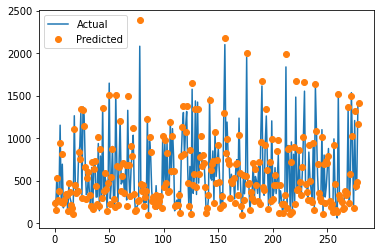

In [ ]:
import matplotlib.pyplot as plt
plt.plot(y_test)
plt.plot(y_pred, 'o')
plt.legend(labels = ('Actual','Predicted'),loc='upper left')

plt.show()

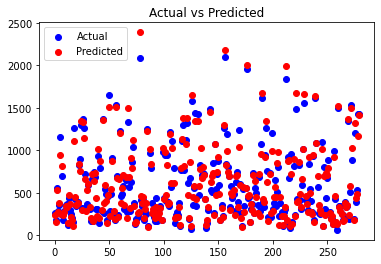

In [ ]:
def plotGraph(y_test,y_pred,regressorName):
    if max(y_test) >= max(y_pred):
        my_range = int(max(y_test))
    else:
        my_range = int(max(y_pred))
    plt.scatter(range(len(y_test)), y_test, color='blue')
    plt.scatter(range(len(y_pred)), y_pred, color='red')
    plt.title(regressorName)
    plt.legend(labels = ('Actual','Predicted'),loc='upper left')
    plt.show()
    return

plotGraph(y_test, y_pred, "Actual vs Predicted")

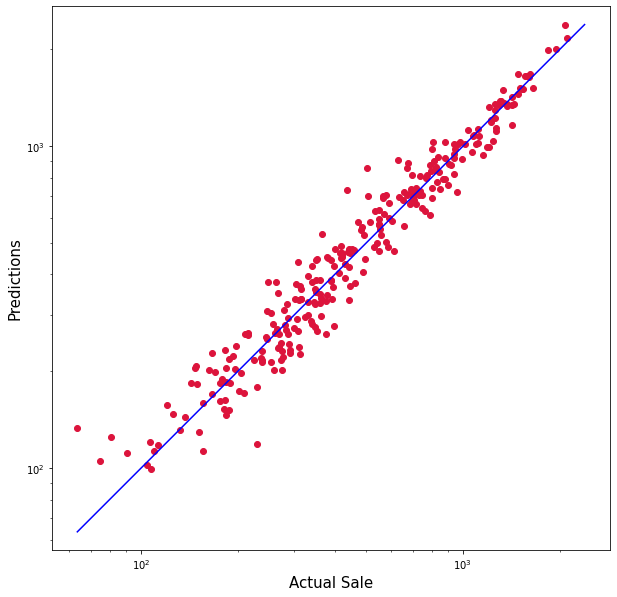

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.scatter(y_test, y_pred, c='crimson')
plt.yscale('log')
plt.xscale('log')

p1 = max(max(y_pred), max(y_test))
p2 = min(min(y_pred), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('Actual Sale', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()

In [ ]:
#generate timestamp
import datetime
base = datetime.datetime.today()
date_list = [base - datetime.timedelta(days=x) for x in range(60)]
date_list[0]
df=[]
from datetime import datetime
#d=pd.Timestamp(date_list[0])
for i in range(30):
  df.append(datetime.timestamp(date_list[i]))
df= preprocessing.normalize([df])
print(df)
value=[]
import random
for _ in range(30):
	value.append(random.randint(4,3500))
print(value)

[[0.18271364 0.18270402 0.1826944  0.18268478 0.18267516 0.18266554
  0.18265592 0.18264631 0.18263669 0.18262707 0.18261745 0.18260783
  0.18259821 0.18258859 0.18257898 0.18256936 0.18255974 0.18255012
  0.1825405  0.18253088 0.18252126 0.18251165 0.18250203 0.18249241
  0.18248279 0.18247317 0.18246355 0.18245393 0.18244432 0.1824347 ]]
[1353, 3007, 2309, 1418, 2804, 2316, 1566, 759, 646, 67, 1725, 1980, 1487, 1120, 374, 3214, 2603, 873, 1399, 3268, 2445, 946, 1991, 2261, 3210, 856, 452, 1250, 2109, 1264]


In [ ]:
#Generate Random Data and predict sale
sale = np.vstack((value, df)).T
sale_pred = LR.predict(sale)
print(sale_pred)

[[3465.80631065]
 [4668.56930292]
 [4160.77736802]
 [3512.62101946]
 [4520.47384146]
 [4165.41002506]
 [3619.79969891]
 [3032.73459775]
 [2950.39956438]
 [2529.1535633 ]
 [3734.82566259]
 [3920.12847497]
 [3561.42827479]
 [3294.36494572]
 [2751.66372659]
 [4816.97695   ]
 [4372.45809276]
 [3114.11654696]
 [3496.51135988]
 [4855.63885443]
 [4256.93732518]
 [3166.59670973]
 [3926.44815836]
 [4122.66012206]
 [4812.69300224]
 [3100.53076147]
 [2806.55819247]
 [3386.77228268]
 [4011.35025493]
 [3396.64863708]]


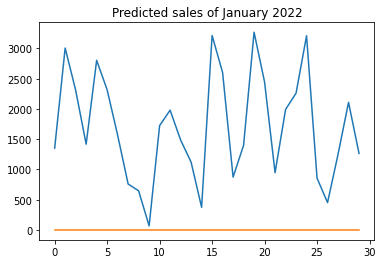

In [ ]:
plt.plot(sale)
plt.title('Predicted sales of January 2022')
plt.show()

In [ ]:

olsr_results = linear_model.OLS(y_train, X_train).fit()
olsr_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.988
Model:                            OLS   Adj. R-squared (uncentered):              0.988
Method:                 Least Squares   F-statistic:                          3.438e+04
Date:                Mon, 03 Jan 2022   Prob (F-statistic):                        0.00
Time:                        21:21:09   Log-Likelihood:                         -4917.4
No. Observations:                 840   AIC:                                      9839.
Df Residuals:                     838   BIC:                                      9848.
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.7291      0.005    151.969      0.000       0.720       0.739
x2          1791.7018    158.686     11.291      0.000    1480.234    2103.170
==============================================================================
Omnibus:                       22.924   Durbin-Watson:                   2.065
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               50.550
Skew:                          -0.014   Prob(JB):                     1.05e-11
Kurtosis:                       4.201   Cond. No.                     5.39e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.39e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

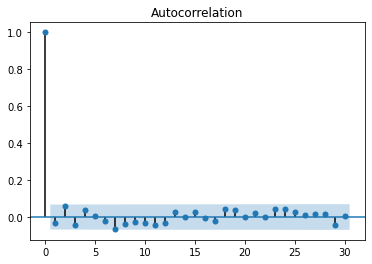

In [ ]:
tsa.plot_acf(olsr_results.resid, alpha=0.05)
plt.show()

In [ ]:
#Time to apply ARIMA
sarimax_model = ARIMA(endog=y_train, exog=X_train,order=(1,1,0))
sarimax_results = sarimax_model.fit()

sarimax_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                    D.y   No. Observations:                  839
Model:                 ARIMA(1, 1, 0)   Log Likelihood               -6333.471
Method:                       css-mle   S.D. of innovations            459.375
Date:                Mon, 03 Jan 2022   AIC                          12676.942
Time:                        21:33:00   BIC                          12700.603
Sample:                             1   HQIC                         12686.011
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       -428.9008    791.036     -0.542      0.588   -1979.302    1121.501
x1             0.6083      0.050     12.101      0.000       0.510       0.707
x2         -1474.4654   2.65e+04     -0.056      0.956   -5.35e+04    5.05e+04
ar.L1.D.y     -0.2112      0.066     -3.200      0.001      -0.341      -0.082
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -4.7354           +0.0000j            4.7354            0.5000
-----------------------------------------------------------------------------
"""

In [ ]:
print(restaurants_df.tail(40))

      Quantity  Total products  Total Price  Timestamp
1080        39             202       175.30   0.030772
1081       104             607       466.00   0.030774
1082        77             458       363.65   0.030776
1083       293            1958      1357.10   0.030777
1084       301            2174      1577.40   0.030779
1085       161             938       728.15   0.030781
1086        89             447       389.95   0.030485
1087       102             527       498.15   0.030537
1088        61             319       362.70   0.030585
1089       156             920       698.45   0.030638
1090       220            1193       986.05   0.030689
1091       288            1707      1296.00   0.030742
1092       102             537       480.40   0.030793
1093        48             208       248.50   0.030846
1094        76             448       355.15   0.030898
1095        79             406       355.80   0.030949
1096       129             860       607.05   0.031002
1097      

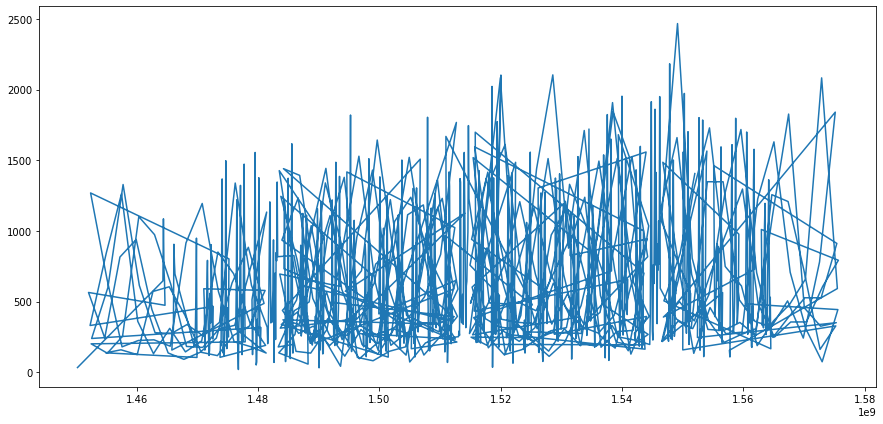

In [ ]:
plt.plot(restaurants_df['Timestamp'].head(),restaurants_df['Total Price'].head())